In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('US_violent_crime.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
print('Urban pop mean',data['UrbanPop'].mean())
print('Urban pop variance',data['UrbanPop'].var())
print('Urban pop stdev',data['UrbanPop'].std())
print("")
print('Assault mean',data['Assault'].mean())
print('Assault variance',data['Assault'].var())
print('Assault stdev',data['Assault'].std())

('Urban pop mean', 65.54)
('Urban pop variance', 209.51877551020405)
('Urban pop stdev', 14.474763400836784)

('Assault mean', 170.76)
('Assault variance', 6945.165714285717)
('Assault stdev', 83.33766084001708)


In [4]:
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import zscore
from scipy.stats import iqr

print(skew(data['Assault']))
print(skew(data['Murder']))

print('Karl-Pearson',kurtosis(data['Assault'],fisher=False))
print('Fisher',kurtosis(data['Assault'],fisher=True))

print(iqr(data['Assault']))
print(iqr(data['Murder']))
print('Iqr',iqr(data[['Assault','Murder']],axis=0))

print(zscore(data['Assault']))

0.227317866591
0.382037848972
('Karl-Pearson', 1.930979948426923)
('Fisher', -1.069020051573077)
140.0
7.175000000000002
('Iqr', array([140.   ,   7.175]))
[ 0.79078716  1.11805959  1.49381682  0.23321191  1.2756352   0.40290872
 -0.73648418  0.81502956  1.99078607  0.48775713 -1.51224105 -0.61527217
  0.94836277 -0.70012057 -1.39102904 -0.67587817 -0.74860538  0.94836277
 -1.06375661  1.56654403 -0.26375734  1.02108998 -1.19708982  1.06957478
  0.0877575  -0.74860538 -0.83345379  0.98472638 -1.37890783 -0.14254532
  1.38472601  1.00896878  2.01502847 -1.52436225 -0.61527217 -0.23951493
 -0.14254532 -0.78496898  0.03927269  1.3119988  -1.027393    0.20896951
  0.36654512 -0.61527217 -1.48799864 -0.17890893 -0.31224214 -1.08799901
 -1.42739264 -0.11830292]


In [5]:
def outlier(col):
    q3=np.quantile(data[col],0.75)
    q1=np.quantile(data[col],0.25)
    iqr=q3-q1
    
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    return data[(data[col]<lower) | (data[col]>upper)]

In [6]:
outlier('Rape')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
1,Alaska,10.0,263,48,44.5
27,Nevada,12.2,252,81,46.0


In [7]:
score=np.abs(zscore(data['UrbanPop']))
np.where(score>2)

(array([44]),)

In [8]:
data.iloc[44]

Unnamed: 0    Vermont
Murder            2.2
Assault            48
UrbanPop           32
Rape             11.2
Name: 44, dtype: object

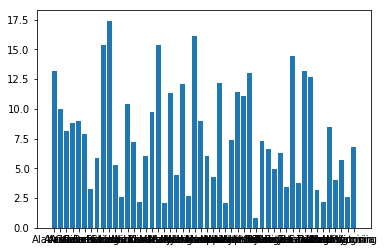

In [35]:
xaxis=data['Unnamed: 0']
yaxis=data['Murder']

plt.bar(xaxis,yaxis)
plt.show()

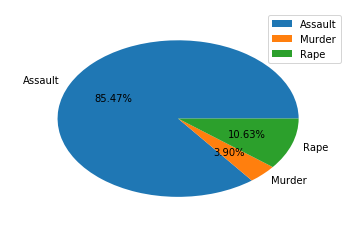

In [33]:
x=data['Assault'].sum(),data['Murder'].sum(),data['Rape'].sum()
label=['Assault','Murder','Rape']

plt.pie(x,labels=label,autopct='%1.2f%%',radius=0.9)
plt.legend()
plt.show()